In [1]:
%matplotlib inline

In [2]:
from __future__ import division



In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import scipy as sp
import seaborn as sns
from theano import tensor as tt
import pandas as pd



In [4]:
blue, *_ = sns.color_palette()


In [5]:
SEED = 5132290 # from random.org

np.random.seed(SEED)

In [6]:
old_faithful_df = pd.read_csv(pm.get_data('old_faithful.csv'))

In [7]:
old_faithful_df['std_waiting'] = (old_faithful_df.waiting - old_faithful_df.waiting.mean()) / old_faithful_df.waiting.std()

In [8]:
old_faithful_df.head()

,eruptions,waiting,std_waiting
0,3.600,79,0.596025
1,1.800,54,-1.242890
2,3.333,74,0.228242
3,2.283,62,-0.654437
4,4.533,85,1.037364


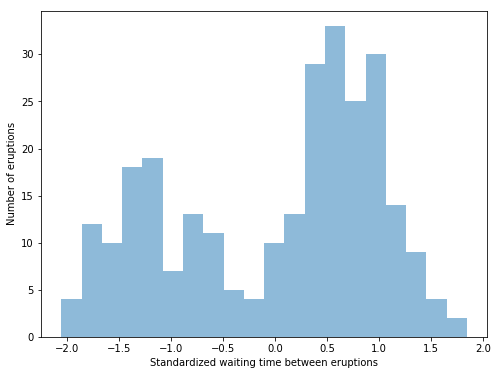

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
ax.hist(old_faithful_df.std_waiting, bins=n_bins, color=blue, lw=0, alpha=0.5);

ax.set_xlabel('Standardized waiting time between eruptions');
ax.set_ylabel('Number of eruptions');

In [10]:
N = old_faithful_df.shape[0]

K = 30


In [11]:
def stick_breaking(beta):
    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1 - beta)[:-1]])

    return beta * portion_remaining

In [12]:
with pm.Model() as model:
    alpha = pm.Gamma('alpha', 1., 1.)
    beta = pm.Beta('beta', 1., alpha, shape=K)
    w = pm.Deterministic('w', stick_breaking(beta))

    tau = pm.Gamma('tau', 1., 1., shape=K)
    lambda_ = pm.Uniform('lambda', 0, 5, shape=K)
    mu = pm.Normal('mu', 0, tau=lambda_ * tau, shape=K)
    obs = pm.NormalMixture('obs', w, mu, tau=lambda_ * tau,
                           observed=old_faithful_df.std_waiting.values)



In [13]:
with model:
    trace = pm.sample(1000, random_seed=SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, lambda, tau, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [01:21<00:00, 73.92draws/s] 
There were 109 divergences after tuning. Increase `target_accept` or reparameterize.
There were 144 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7097618130304207, but should be close to 0.8. Try to increase the number of tuning steps.
There were 192 divergences after tuning. Increase `target_accept` or reparameterize.
There were 76 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [14]:
with model:
    trace = pm.sample(1000, random_seed=SEED, tune = 1000, nuts_kwargs = {'target_accept':0.9})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, lambda, tau, beta, alpha]
Sampling 4 chains: 100%|██████████| 8000/8000 [03:16<00:00, 40.71draws/s]
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 204 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7144418492097572, but should be close to 0.9. Try to increase the number of tuning steps.
There were 173 divergences after tuning. Increase `target_accept` or reparameterize.
There were 86 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [15]:
with model:
    trace = pm.sample(2000, random_seed=SEED, tune = 1000, nuts_kwargs = {'target_accept':0.9})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, lambda, tau, beta, alpha]
Sampling 4 chains: 100%|██████████| 12000/12000 [04:25<00:00, 45.14draws/s] 
There were 134 divergences after tuning. Increase `target_accept` or reparameterize.
There were 268 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7967183634278955, but should be close to 0.9. Try to increase the number of tuning steps.
There were 384 divergences after tuning. Increase `target_accept` or reparameterize.
There were 168 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [16]:
with model:
    trace = pm.sample(2000, random_seed=SEED, tune = 3000, nuts_kwargs = {'target_accept':0.9})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, lambda, tau, beta, alpha]
Sampling 4 chains: 100%|██████████| 20000/20000 [05:50<00:00, 22.96draws/s]
There were 168 divergences after tuning. Increase `target_accept` or reparameterize.
There were 165 divergences after tuning. Increase `target_accept` or reparameterize.
There were 264 divergences after tuning. Increase `target_accept` or reparameterize.
There were 244 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [13]:
#Increase the # of tuning steps, as well as target_accept
with model:
    trace = pm.sample(2000, random_seed=SEED, tune = 10000, nuts_kwargs = {'target_accept':0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, lambda, tau, beta, alpha]
Sampling 4 chains: 100%|██████████| 48000/48000 [20:16<00:00, 39.46draws/s]
There were 115 divergences after tuning. Increase `target_accept` or reparameterize.
There were 167 divergences after tuning. Increase `target_accept` or reparameterize.
There were 151 divergences after tuning. Increase `target_accept` or reparameterize.
There were 291 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.798210814250273, but should be close to 0.95. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [14]:
pm.summary(trace)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu__0,-0.279204,0.912915,0.091046,-1.281634,0.754377,2.038996,8.080869
mu__1,-0.192781,0.919611,0.091125,-1.288809,0.756860,2.343389,2.916684
mu__2,0.023946,0.896799,0.034058,-1.623229,1.650643,131.528490,1.024111
mu__3,0.084744,2.071520,0.112520,-2.972839,2.743676,334.532391,1.002836
mu__4,0.153060,2.001329,0.084086,-2.982313,3.283011,547.764234,1.003245
mu__5,-0.017175,1.723955,0.055121,-3.439096,3.476436,1115.475026,1.000731
mu__6,0.053510,2.049290,0.060473,-4.150880,3.101573,864.039156,1.002446
mu__7,0.133100,2.151418,0.080344,-4.082164,3.864750,616.188097,1.005870
mu__8,0.030383,2.372371,0.089470,-3.980766,4.063968,720.354361,1.002434
mu__9,-0.028987,1.911570,0.059929,-3.305118,3.545604,806.067995,1.002004


In [15]:
pm.trace_to_dataframe(trace).corr()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9,...,lambda__20,lambda__21,lambda__22,lambda__23,lambda__24,lambda__25,lambda__26,lambda__27,lambda__28,lambda__29
mu__0,1.000000,-0.896391,-0.100573,0.009578,0.014986,-0.017992,0.032531,-0.073547,-0.018198,0.029299,...,0.006394,-0.012289,-0.008167,-0.009140,0.004429,-0.007907,-0.056850,-0.016092,0.002163,-0.003693
mu__1,-0.896391,1.000000,-0.040709,-0.023437,-0.015086,0.008833,-0.028772,0.076859,0.047786,-0.048565,...,-0.011476,0.005478,0.009420,0.006383,-0.004216,0.012020,0.054956,0.016278,0.000216,0.007070
mu__2,-0.100573,-0.040709,1.000000,0.003432,-0.012093,-0.027248,-0.006429,-0.003423,-0.020151,0.041892,...,0.009838,0.018259,-0.019609,-0.000106,0.011927,-0.004918,-0.013338,0.002346,-0.000793,-0.013658
mu__3,0.009578,-0.023437,0.003432,1.000000,0.066085,0.004362,-0.003621,-0.018050,0.021286,0.006395,...,0.005407,-0.016678,0.005438,0.008296,-0.001961,0.016970,0.017935,0.010269,-0.002574,-0.007081
mu__4,0.014986,-0.015086,-0.012093,0.066085,1.000000,-0.003523,-0.009665,0.007362,0.021539,0.024556,...,0.004949,0.019541,0.013105,0.006381,0.000477,-0.002361,-0.018620,-0.000932,0.014018,-0.012770
mu__5,-0.017992,0.008833,-0.027248,0.004362,-0.003523,1.000000,-0.000365,-0.020342,0.025254,-0.003977,...,0.000588,-0.024034,-0.010755,0.002456,0.012651,0.023666,0.026145,-0.003152,-0.020399,0.019835
mu__6,0.032531,-0.028772,-0.006429,-0.003621,-0.009665,-0.000365,1.000000,-0.013266,0.013006,-0.012764,...,0.009753,0.003399,-0.011452,0.020249,-0.012675,0.021433,-0.016130,-0.015141,0.010046,0.008363
mu__7,-0.073547,0.076859,-0.003423,-0.018050,0.007362,-0.020342,-0.013266,1.000000,-0.001161,-0.000797,...,-0.001234,-0.007565,0.021818,-0.007089,0.001080,-0.000017,-0.003088,0.011879,-0.004633,-0.003115
mu__8,-0.018198,0.047786,-0.020151,0.021286,0.021539,0.025254,0.013006,-0.001161,1.000000,-0.003703,...,-0.003564,-0.006144,0.002756,-0.032108,0.006895,-0.001009,0.017115,-0.021199,-0.012773,0.030366
mu__9,0.029299,-0.048565,0.041892,0.006395,0.024556,-0.003977,-0.012764,-0.000797,-0.003703,1.000000,...,0.027684,-0.002780,-0.010542,-0.004615,-0.002731,0.013811,-0.004699,-0.009735,0.001289,0.007490


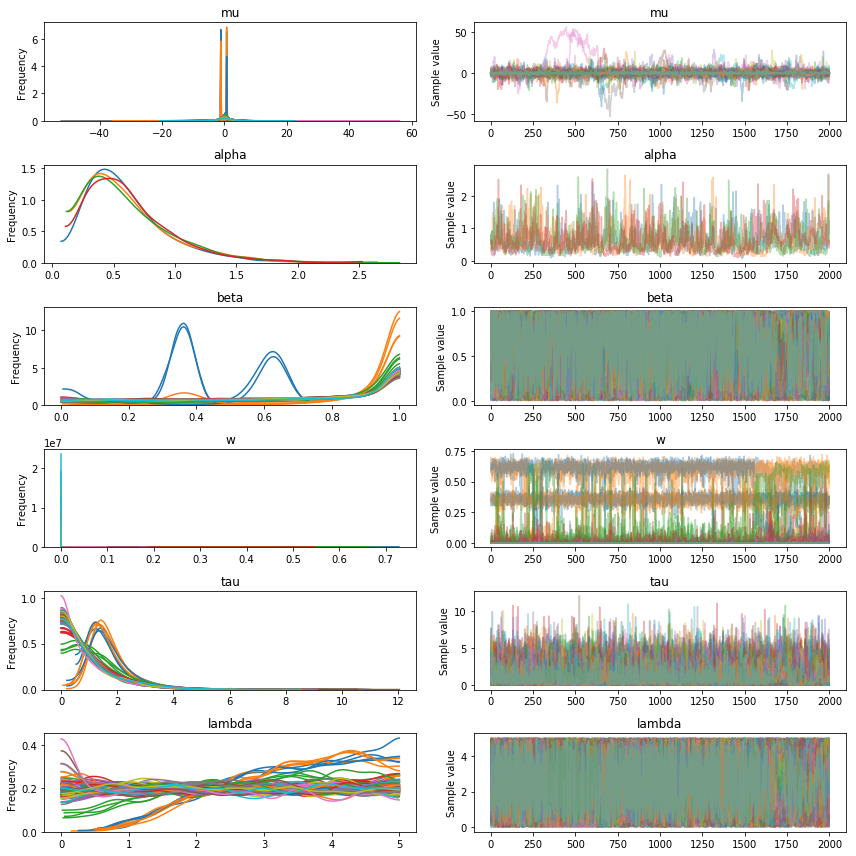

In [16]:
pm.traceplot(trace);

In [17]:
trace.varnames

['alpha_log__',
 'beta_logodds__',
 'tau_log__',
 'lambda_interval__',
 'mu',
 'alpha',
 'beta',
 'w',
 'tau',
 'lambda']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90ddafe8d0>,
      dtype=object)

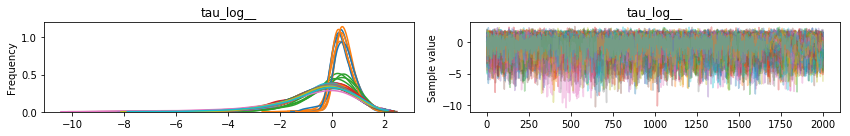

In [18]:
pm.traceplot(trace, varnames=['tau_log__'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90e35fd198>,
      dtype=object)

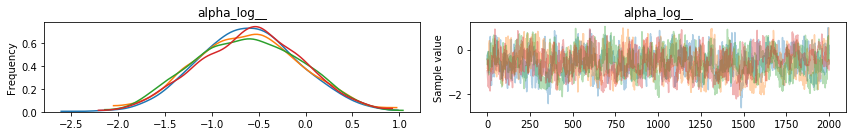

In [19]:
pm.traceplot(trace, varnames=['alpha_log__'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90d46372e8>,
      dtype=object)

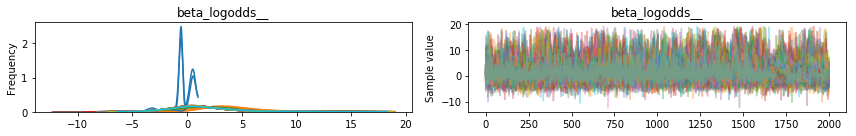

In [20]:
pm.traceplot(trace, varnames=['beta_logodds__'])

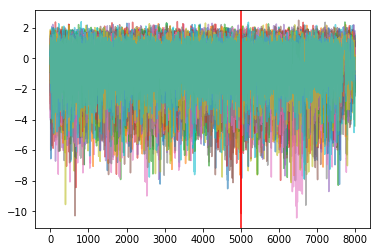

In [21]:
plt.plot(trace['tau_log__'], alpha=0.6)
plt.axvline(5000, color="r")
#plt.plot(short_trace['tau_log_'][5000:], alpha=0.6);

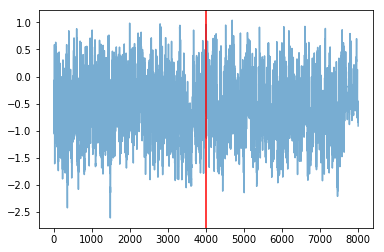

In [22]:
plt.plot(trace['alpha_log__'], alpha=0.6)
plt.axvline(4000, color="r")

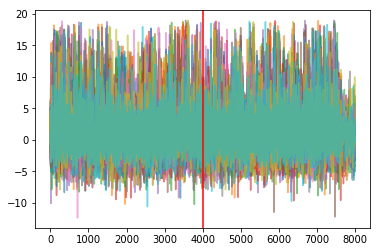

In [23]:
plt.plot(trace['beta_logodds__'], alpha=0.6)
plt.axvline(4000, color="r")

In [24]:
divergent = trace['diverging']
divergent


array([False, False, False, ..., False,  True,  True])

In [25]:
def biasplot(trace):
    logtau = trace['tau_log__']
    mlogtau = [np.mean(logtau[:i]) for i in np.arange(1, len(logtau))]
    plt.figure(figsize=(8, 2))
    plt.axhline(0.7657852, lw=2.5, color='gray')
    plt.plot(mlogtau, lw=2.5)
    plt.ylim(0, 2)
    plt.xlabel('Iteration')
    plt.ylabel('MCMC mean of log(tau)')
    plt.title('MCMC estimation of cumsum log(tau)')



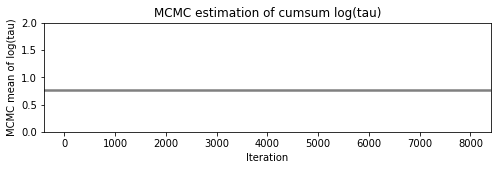

In [26]:
biasplot(trace)


In [27]:
np.mean(trace['mean_tree_accept'])


0.9129998356110135

In [28]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import pymc3 as pm

import arviz as az

In [29]:
azdata1 = az.from_pymc3(
    trace=trace)


/home/tourist/.local/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


In [30]:
az.bfmi(azdata1.sample_stats.energy)


array([0.52811707, 0.53714204, 0.47279315, 0.51765825])

In [31]:
#Lite


In [32]:
for t in [trace]:
    print("Acceptance", np.mean(t['mean_tree_accept']), "Step Size", np.mean(t['step_size']), "Divergence", np.sum(t['diverging']))


Acceptance 0.9129998356110135 Step Size 0.061027807390106686 Divergence 724


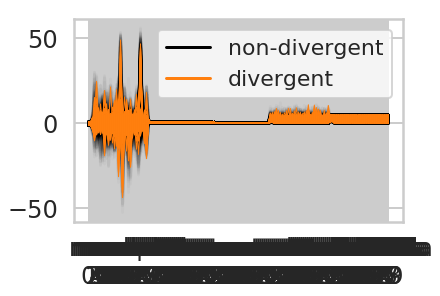

In [35]:
az.plot_parallel(az.from_pymc3(trace=trace))

In [36]:
with pm.Model() as model:
    alpha = pm.Gamma('alpha', 1., 1.)
    beta = pm.Beta('beta', 1., alpha, shape=K)
    w = pm.Deterministic('w', stick_breaking(beta))
    tau = pm.Gamma('tau', 1., 1., shape=K)
    lambda_ = pm.Uniform('lambda_', 0, 5, shape=K)
    mu_offset = pm.Normal('mu_offset', 0, tau=1, shape=K)
    mu = pm.Deterministic('mu', 0 + mu_offset / (lambda_ * tau))
    obs = pm.NormalMixture('obs', w, mu, tau=lambda_ * tau,
                           observed=old_faithful_df.std_waiting.values)

In [37]:
with model:
    trace = pm.sample(5000, random_seed=SEED, tune = 1000, nuts_kwargs = {'target_accept':0.9})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_offset, lambda_, tau, beta, alpha]
Sampling 4 chains: 100%|██████████| 24000/24000 [09:01<00:00, 20.88draws/s]
There were 470 divergences after tuning. Increase `target_accept` or reparameterize.
There were 668 divergences after tuning. Increase `target_accept` or reparameterize.
There were 389 divergences after tuning. Increase `target_accept` or reparameterize.
There were 474 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [38]:
divergent = trace['diverging']
print('Number of Divergent %d' % divergent.nonzero()[0].size)
divperc = divergent.nonzero()[0].size/len(trace)
print('Percentage of Divergent %.5f' % divperc)


Number of Divergent 2002
Percentage of Divergent 0.40040


/home/tourist/.local/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


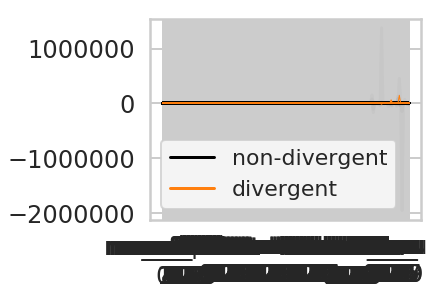

In [40]:
az.plot_parallel(az.from_pymc3(trace=trace))

In [41]:
def resample_plot(t):
    sns.distplot(t['energy']-t['energy'].mean(), label="P(E)")
    sns.distplot(np.diff(t['energy']), label = "p(E | q)")
    plt.legend();
    plt.xlabel("E - <E>")
    


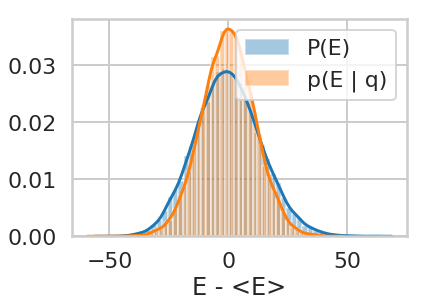

In [42]:
resample_plot(trace)


In [43]:
with model:
    step = pm.NUTS(target_accept=.95)
    trace2_95 = pm.sample(10000, step=step, init="advi+adapt_diag")


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_offset, lambda_, tau, beta, alpha]
Sampling 4 chains: 100%|██████████| 42000/42000 [22:32<00:00, 31.05draws/s]
There were 1272 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1079 divergences after tuning. Increase `target_accept` or reparameterize.
There were 756 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8857794379688001, but should be close to 0.95. Try to increase the number of tuning steps.
There were 1143 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
